# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
c=pd.read_csv('CardioGoodFitness.csv')
c.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [29]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [30]:
c.Usage.value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [31]:
c=c.astype({'Usage':'object','Fitness':'object'})
c[['Usage','Fitness']].dtypes

Usage      object
Fitness    object
dtype: object

In [32]:
c.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


In [33]:
c.describe(include='object')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,TM195,Male,Partnered,3,3
freq,80,104,107,69,97


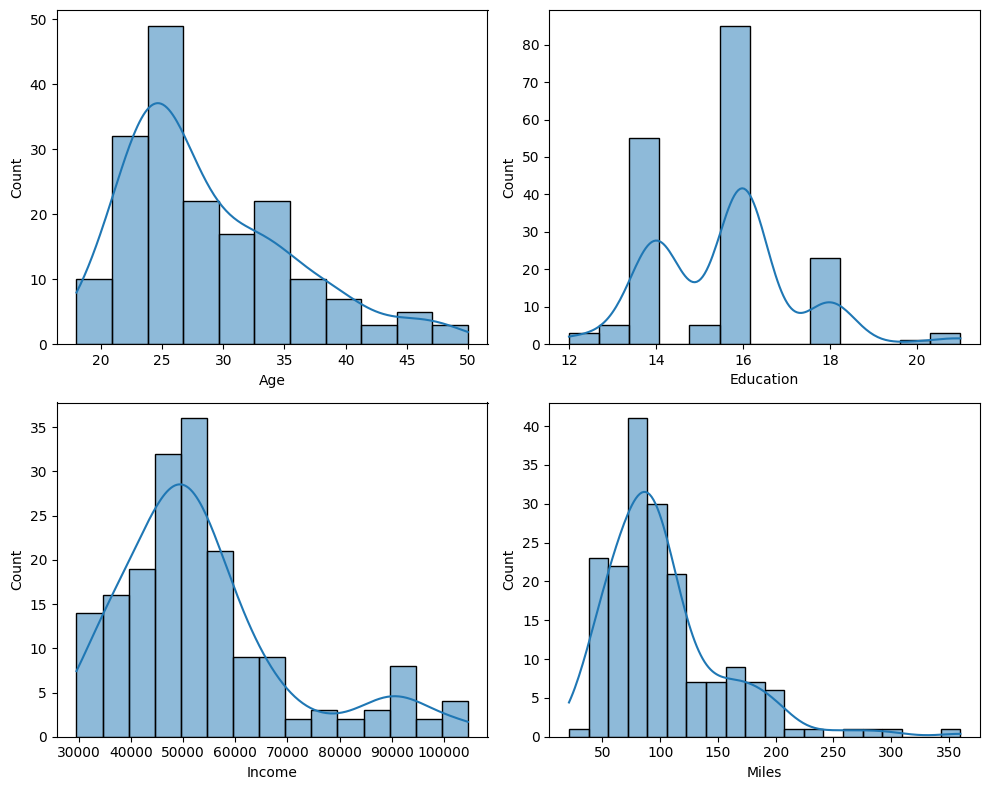

In [34]:
x=1
plt.figure(figsize=(10,8))
for i in c.select_dtypes(int):
    plt.subplot(2,2,x)
    sns.histplot(x=c[i],kde=True)
    x+=1
plt.tight_layout()
plt.show()

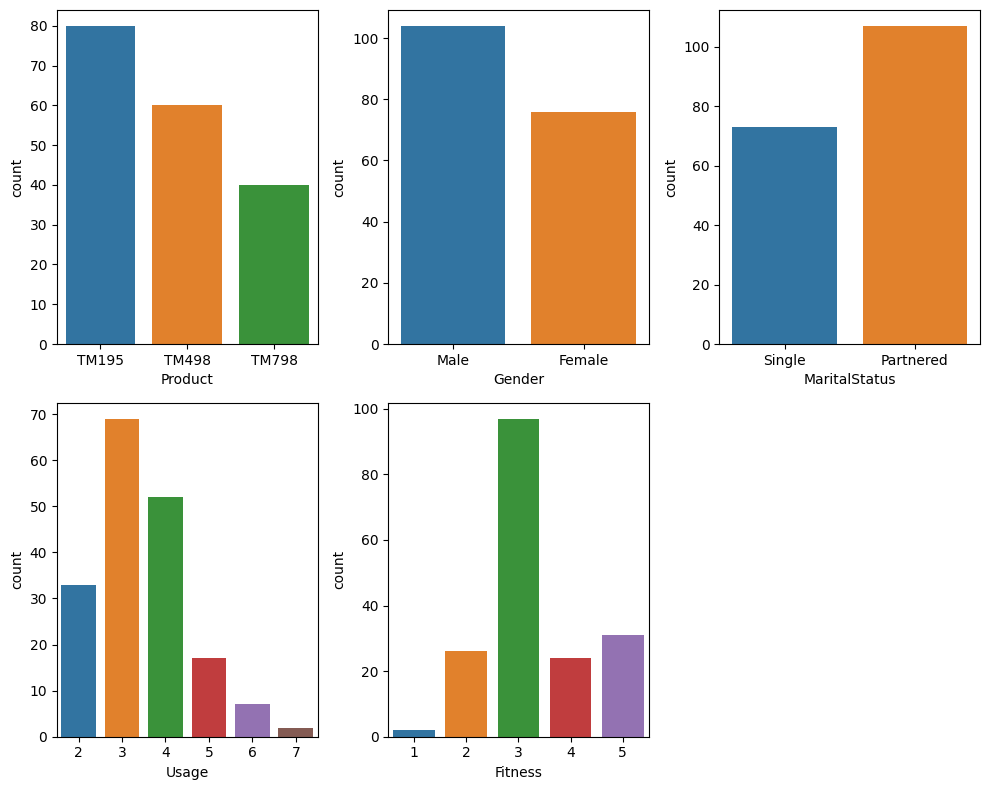

In [35]:
x=1
plt.figure(figsize=(10,8))
for i in c.select_dtypes('O'):
    plt.subplot(2,3,x)
    sns.countplot(x=c[i])
    x+=1
plt.tight_layout()
plt.show()

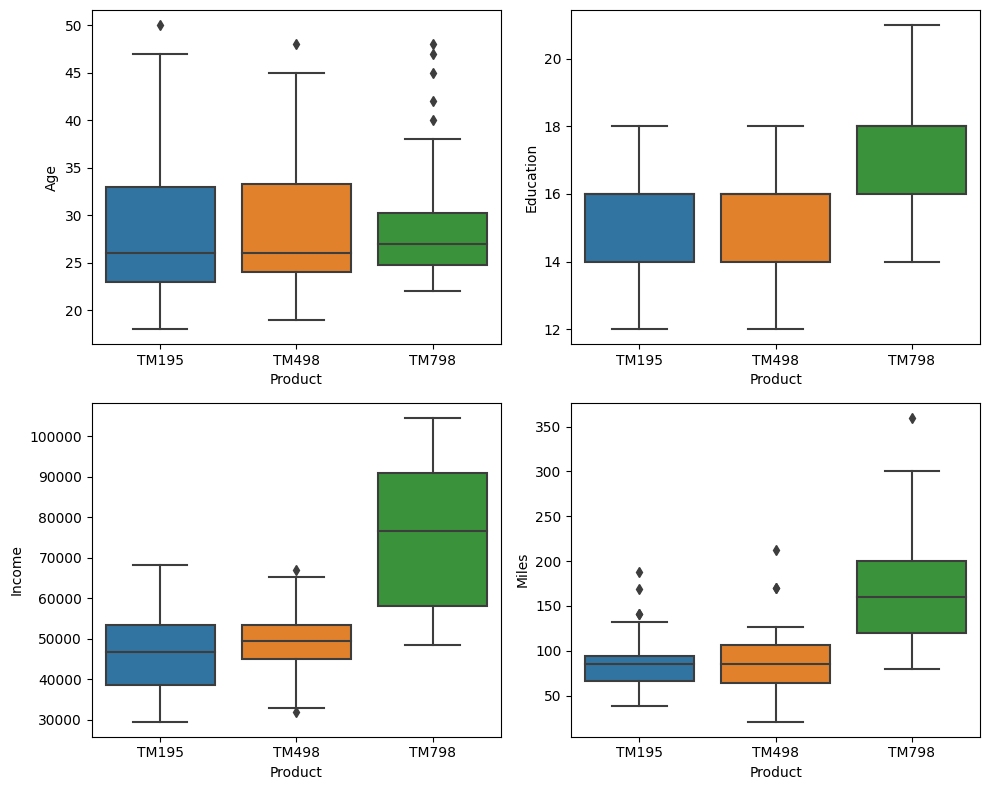

In [36]:
x=1
plt.figure(figsize=(10,8))
for i in c.select_dtypes(int):
    plt.subplot(2,2,x)
    sns.boxplot(x=c.Product,y=c[i])
    x+=1
plt.tight_layout()
plt.show()

# As we can observe, TM798 is preferred by customers with more than 16 years of education.
# TM798 is also used significantly more by customers with a higher income and customers who like to 
# work out more than 100 miles per week.

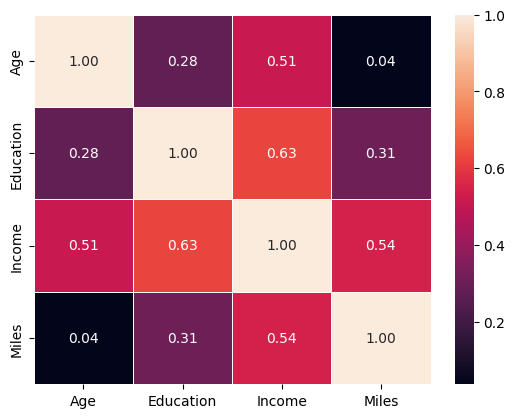

In [37]:
sns.heatmap(c.corr(numeric_only=True),annot=True,fmt='.2f',linewidths=.5)
plt.show()

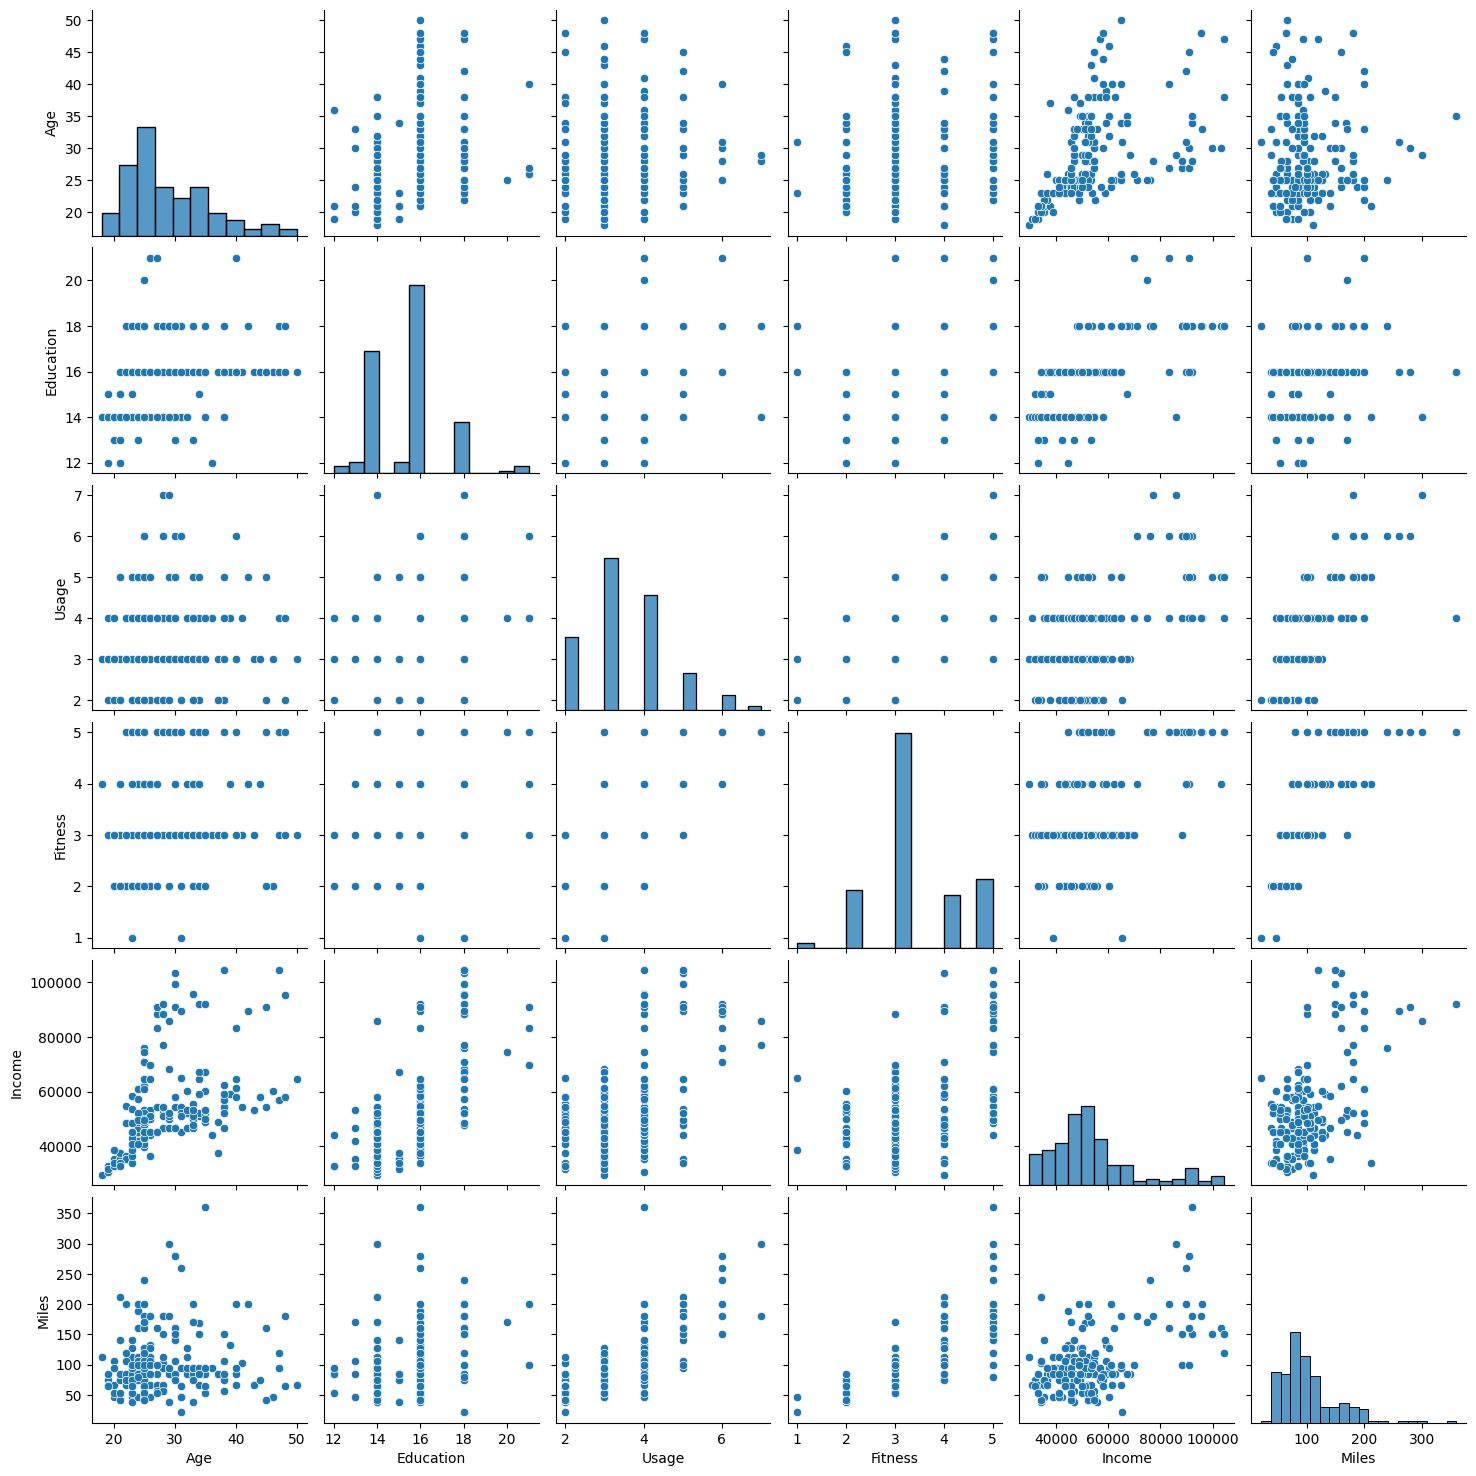

In [38]:
sns.pairplot(c)
plt.show()

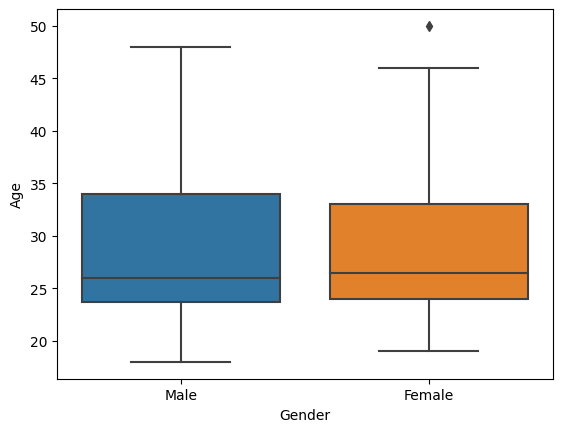

In [39]:
sns.boxplot(x=c.Gender,y=c.Age)
plt.show()

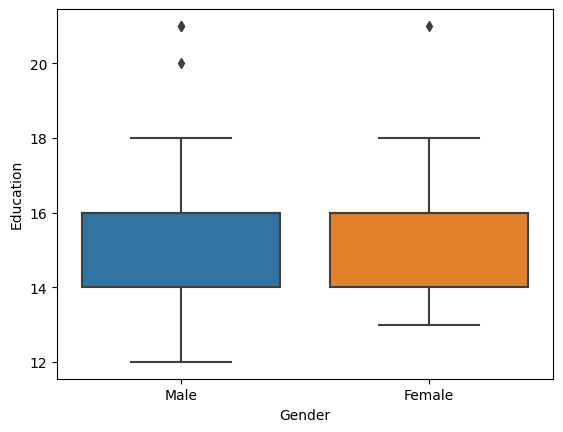

In [40]:
sns.boxplot(x=c.Gender,y=c.Education)
plt.show()

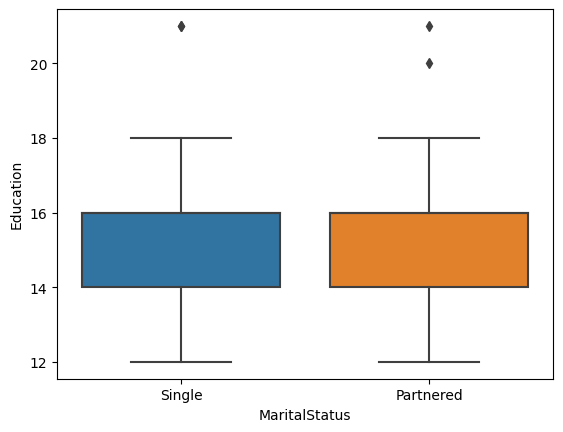

In [41]:
sns.boxplot(x=c.MaritalStatus,y=c.Education)
plt.show()

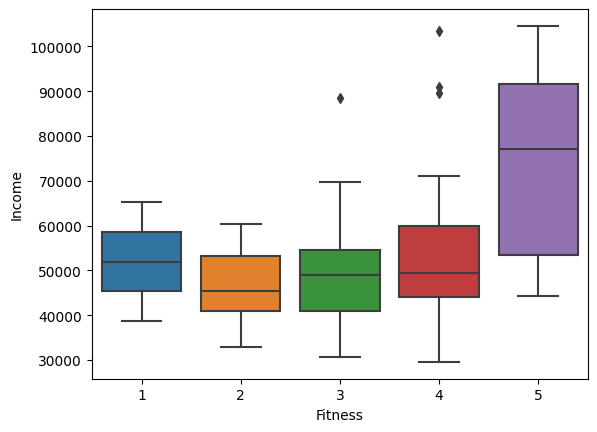

In [42]:
sns.boxplot(x=c.Fitness,y=c.Income)
plt.show()

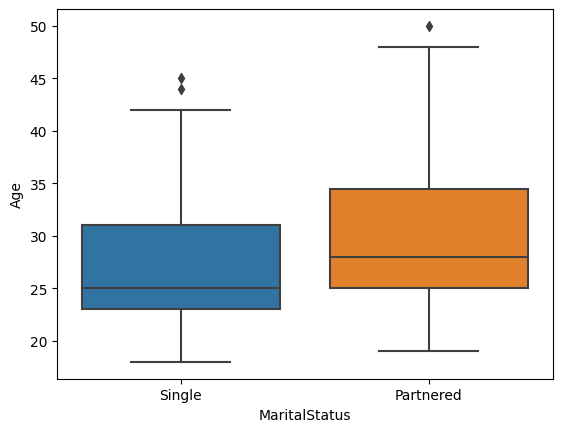

In [43]:
sns.boxplot(x=c.MaritalStatus,y=c.Age)
plt.show()

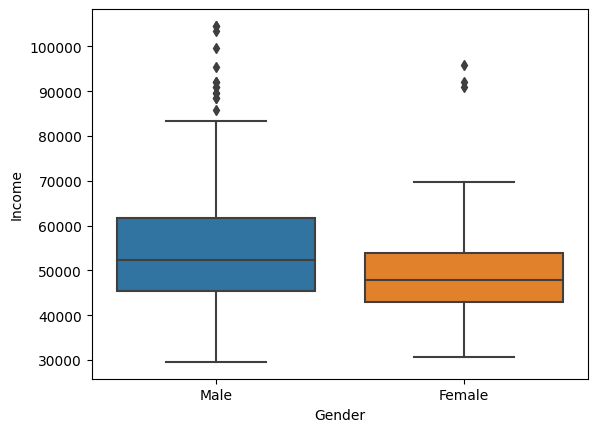

In [44]:
sns.boxplot(x=c.Gender,y=c.Income)
plt.show()

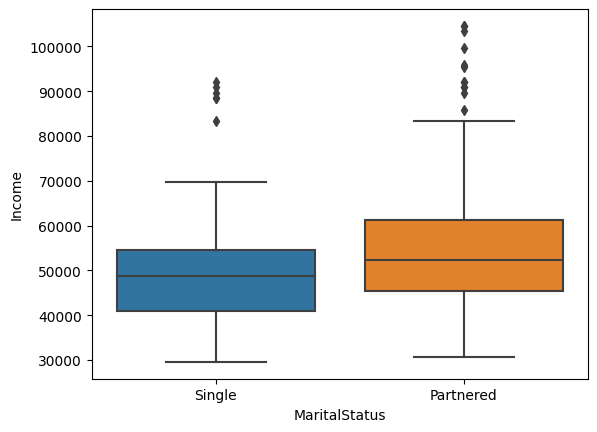

In [45]:
sns.boxplot(x=c.MaritalStatus,y=c.Income)
plt.show()

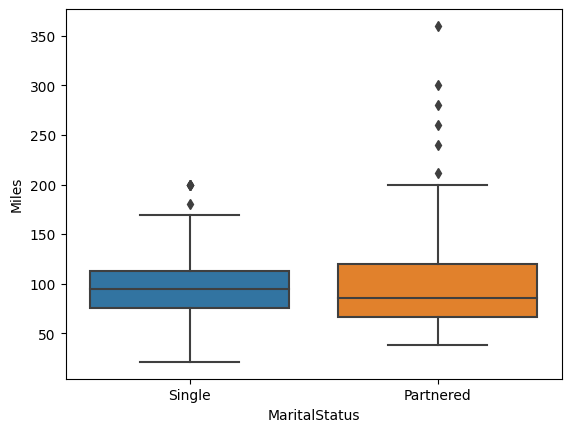

In [46]:
sns.boxplot(x=c.MaritalStatus,y=c.Miles)
plt.show()

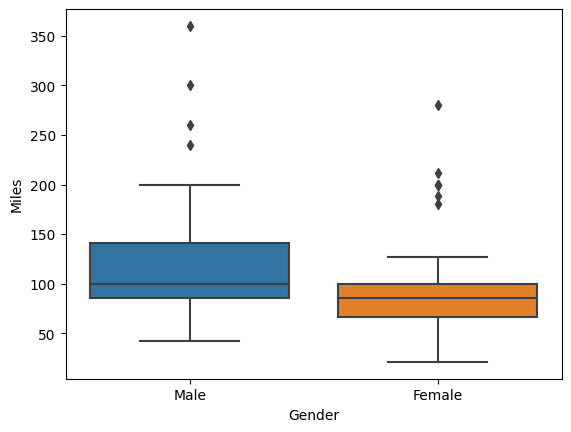

In [47]:
sns.boxplot(x=c.Gender,y=c.Miles)
plt.show()

In [48]:
c.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

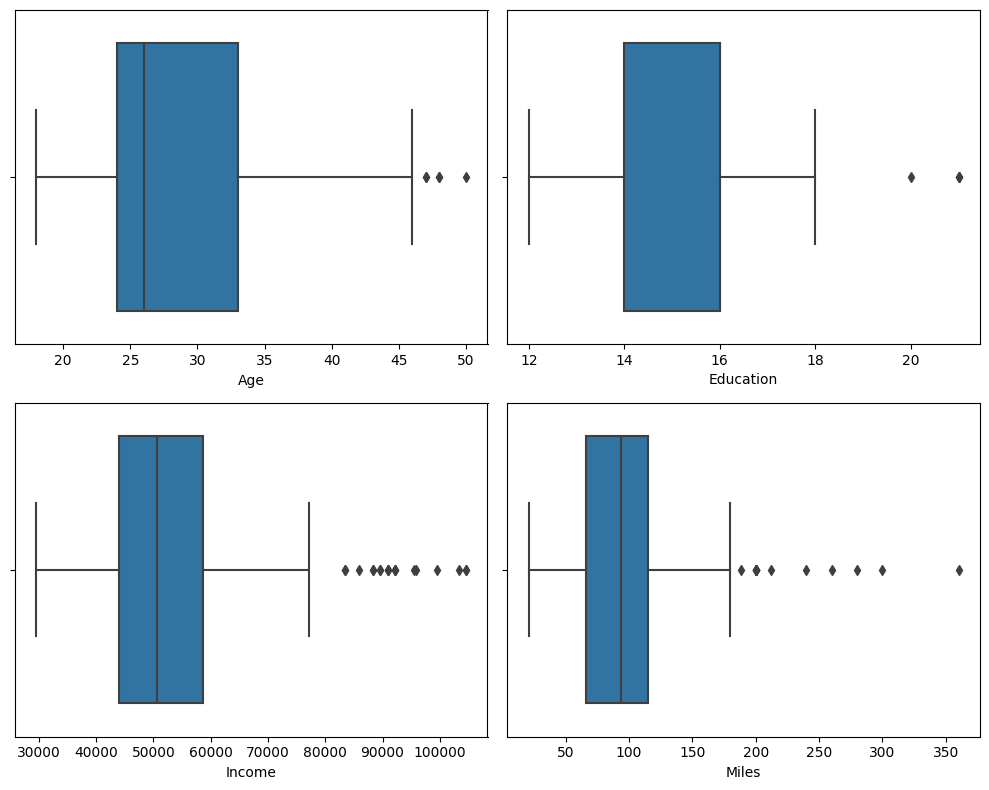

In [49]:
x=1
plt.figure(figsize=(10,8))
for i in c.select_dtypes(int):
    plt.subplot(2,2,x)
    sns.boxplot(x=c[i])
    x+=1
plt.tight_layout()
plt.show()

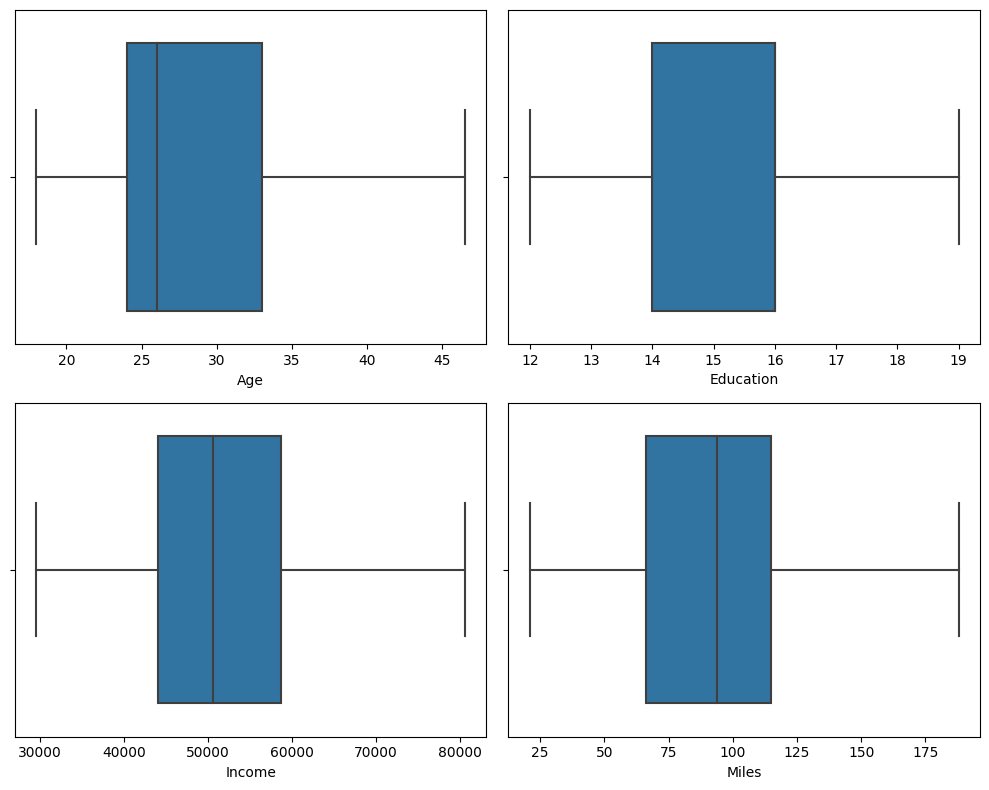

In [61]:
for i in c.select_dtypes(int):
    q1,q3=c[i].quantile(.25),c[i].quantile(.75)
    c[i]=np.where(c[i]<q1-1.5*(q3-q1),q1-1.5*(q3-q1),c[i])
    c[i]=np.where(c[i]>q3+1.5*(q3-q1),q3+1.5*(q3-q1),c[i])
x=1
plt.figure(figsize=(10,8))
for i in c.select_dtypes('number'):
    plt.subplot(2,2,x)
    sns.boxplot(x=c[i])
    x+=1
plt.tight_layout()
plt.show()

In [66]:
pd.crosstab(c.Gender,c.Product)

# There are more number of male customers than female customers for TM798.

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


In [70]:
pd.crosstab(c.MaritalStatus,c.Product)

Product,TM195,TM498,TM798
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [72]:
pd.crosstab(c.Usage,c.Product)

# Customers who work out more like to purchase TM798.

Product,TM195,TM498,TM798
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


In [74]:
pd.crosstab(c.Fitness,c.Product)

# Customers who purchased TM798 are more fit than customers who purchased other products.

Product,TM195,TM498,TM798
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


### TM195 and TM498 Customers

Age: 20-50 years

Gender: Male as well as female

Education: 12-18 years

Marital Status: Single as well as Partnered

Usage: Typically 2-4 times per week

Fitness: Typically 2-4

Income: 30000-70000

Miles: Upto 150 per week

### TM798 customers

Age: 20-50 years

Gender: Mostly male

Education: More than 14 years

Marital Status: Single as well as Partnered

Usage: Typically 4-6 times per week

Fitness: 3-5

Income: More than 50000

Miles: 100-300 per week